In [1]:
from LCSPS import LCSPS
from LCSPSLane import LCSPSLane

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import sys 

sys.path.append('/Users/thinhhoang/Documents/anomaly-detection-ngsim/lanechange')

pfile = pickle.load(open( "lane.pyo", "rb" ))
tvec = pfile['t_vec'][0]
xvec = pfile['x_vec']

fpca_discretized = pickle.load(open('fpca.pyo', 'rb'))
basis = fpca_discretized.components_.data_matrix.reshape((-1,fpca_discretized.components_.data_matrix.shape[1])).transpose()
basis = basis[:,:2]
mean = fpca_discretized.mean_.data_matrix.reshape((-1,1))

lcdts = pickle.load(open('lcsp.pyo','rb'))

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


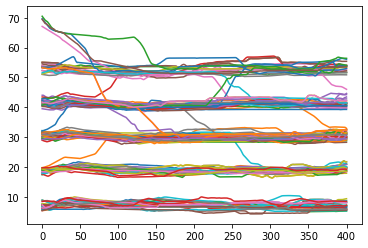

In [4]:
for i in range(xvec.shape[0]):
    plt.plot(xvec[i,:])

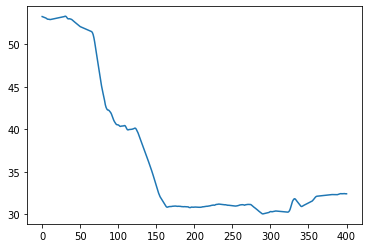

In [5]:
sample_traj = xvec[111,:]

# sample_traj = np.zeros_like(mean)
# sample_traj[:24] = (lcdts[0].reshape((-1,1)) - mean)[0]
# sample_traj[24:] = (lcdts[0].reshape((-1,1)) - mean)[:-24]
# sample_traj = xvec[16,:]
plt.plot(sample_traj)
plt.show()

Text(0.5, 1.0, 'Mean')

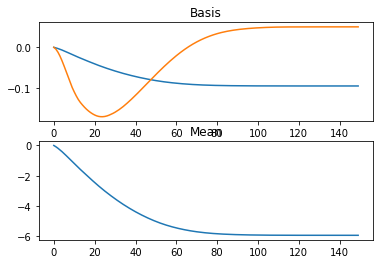

In [6]:
plt.subplot(2,1,1)
for i in range(basis.shape[1]):
    plt.plot(-basis[:,i])
plt.title('Basis')
plt.subplot(2,1,2)
plt.plot(-mean)
plt.title('Mean')

## Detection code

In [51]:
lcs = LCSPSLane(
    np.array([[0],[0]]),
    np.array([[1000,0],[0,1000]]),
    0.5,
    -mean,
    -basis,
    [53.0]
)

Initialization of LCSPS completed


In [52]:
for i in range(300):
    lcs.add_datum(sample_traj[i])
print('Completed adding datums into the LCS')

Completed adding datums into the LCS


Some debugging: see the likelihood of each segment. The segmentor tries to maximize this likelihood!

This is for lane 53.0m

40 80 => [[-71.69196755]]
40 90 => [[-89.51283213]]
45 85 => [[-61.51598048]]
45 95 => [[-78.8953678]]
50 90 => [[-62.61025543]]
50 100 => [[-96.93215608]]
55 95 => [[-74.78862585]]
55 105 => [[-103.92964082]]
60 100 => [[-51.20684415]]
60 110 => [[-60.49155831]]
65 105 => [[-37.97868284]]
65 115 => [[-46.78539094]]
70 110 => [[-227.99621955]]
70 120 => [[-271.96135925]]
75 115 => [[-647.56050246]]
75 125 => [[-723.99257487]]
80 120 => [[-1086.7920336]]
80 130 => [[-1229.35753981]]


array([[-1027.81778102]])

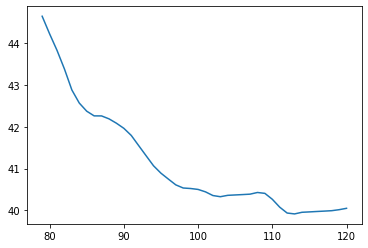

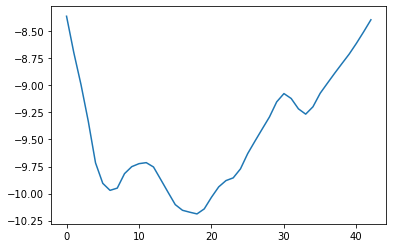

In [53]:
for i in range(40,85,5):
    j = i + 40
    print(i, j, "=>", lcs.marginalize_repr_subseq(i,j, lane_start=53.0))
    j = i + 50
    print(i, j, "=>", lcs.marginalize_repr_subseq(i,j, lane_start=53.0))
plt.plot(np.arange(79,121), sample_traj[79:121])
lcs.marginalize_repr_subseq(79, 121, plot_x=True)

In [54]:
pij = lcs.marginalize_repr_all_subseqs()

In [55]:
ck = lcs.get_change_point(pij, K=2)

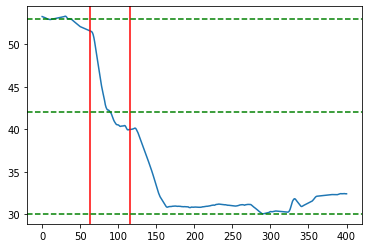

In [56]:
plt.plot(sample_traj)
for i in range(len(ck)):
    if i>0 and i<len(ck)-1:
        plt.axvline(x=ck[i], color='r')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=42, color='g', linestyle='--')
plt.axhline(y=53, color='g', linestyle='--')

In [57]:
ck

array([ -1.,  63., 116., 298.])